In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.image import load_img

In [3]:
current_dir = !pwd
path = current_dir[0]+"/train/t-shirt"
name = "a4ff0158-4981-43d5-aed5-6898e5c1bfb2.jpg"
full_name = f'{path}/{name}'

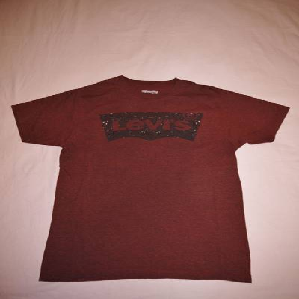

In [4]:
img = load_img(full_name, target_size=(299,299))
img 

In [5]:
x = np.array(img)
x.shape

(299, 299, 3)

In [ ]:
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from keras.applications.xception import decode_predictions

model = Xception(weights='imagenet', input_shape=(299,299,3))

X = np.array([x])

X.shape

X = preprocess_input(X)

pred = model.predict(X)

pred.shape

decode_predictions(pred)



In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory('./train', 
                                         target_size=(150,150), 
                                         batch_size=32)

valid_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid_ds = valid_gen.flow_from_directory('./validation', 
                                         target_size=(150,150), 
                                         batch_size=32, shuffle=False)

In [10]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [11]:
x,y = next(train_ds)

In [12]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3),
)

base_model.trainable = False

In [13]:
#Functional Style
inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training =False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [14]:
preds = model.predict(x)

2024-10-30 15:29:57.510486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 876ms/step


In [15]:
preds[0]

array([-0.7690594 , -0.99748605,  0.53522867, -0.30717927, -0.5274794 ,
        0.37263167,  0.01177347, -0.8199936 ,  0.41982   , -0.819029  ],
      dtype=float32)

In [18]:
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])



In [19]:
training_history = model.fit(train_ds, epochs=10, validation_data=valid_ds)

Epoch 1/10


2024-10-29 16:50:14.667866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.1033 - accuracy: 0.6346

2024-10-29 16:51:00.674333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 54s 530ms/step - loss: 1.1033 - accuracy: 0.6346 - val_loss: 0.7140 - val_accuracy: 0.7683
Epoch 2/10
96/96 [==============================] - 51s 537ms/step - loss: 0.6329 - accuracy: 0.7813 - val_loss: 0.6344 - val_accuracy: 0.7889
Epoch 3/10
96/96 [==============================] - 51s 533ms/step - loss: 0.5072 - accuracy: 0.8315 - val_loss: 0.5986 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 58s 599ms/step - loss: 0.4331 - accuracy: 0.8654 - val_loss: 0.5661 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 60s 629ms/step - loss: 0.3744 - accuracy: 0.8787 - val_loss: 0.5640 - val_accuracy: 0.8182
Epoch 6/10
96/96 [==============================] - 47s 494ms/step - loss: 0.3266 - accuracy: 0.9094 - val_loss: 0.5394 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 51s 536ms/step - loss: 0.2881 - accuracy: 0.9267 - val_loss: 0.5572 - val_accuracy: 0.8182
Epoch 8/10

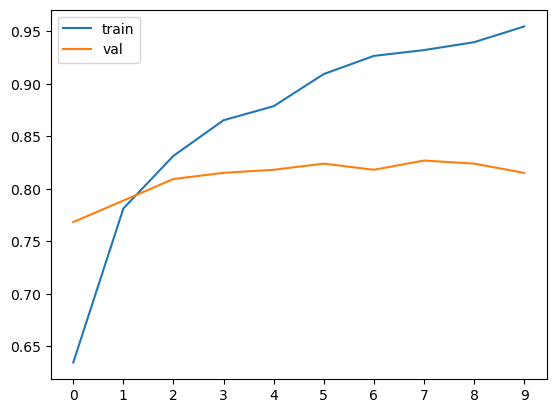

In [20]:
plt.plot(training_history.history['accuracy'], label = 'train')
plt.plot(training_history.history['val_accuracy'], label = 'val')
plt.xticks(np.arange(10))

plt.legend()

In [24]:
def make_model(learning_rate=0.01):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3),
    )
    
    base_model.trainable = False
    #########################################
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training =False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    #################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics = ['accuracy'])

    return model

In [25]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    training_history = model.fit(train_ds, epochs=10, validation_data=valid_ds)
    scores[lr]= training_history.history
    print()
    print()

0.0001
Epoch 1/10


2024-10-29 17:01:43.955753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.9483 - accuracy: 0.3559

2024-10-29 17:02:32.583789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 57s 576ms/step - loss: 1.9483 - accuracy: 0.3559 - val_loss: 1.5954 - val_accuracy: 0.4985
Epoch 2/10
96/96 [==============================] - 58s 607ms/step - loss: 1.3865 - accuracy: 0.5642 - val_loss: 1.2397 - val_accuracy: 0.6217
Epoch 3/10
96/96 [==============================] - 52s 538ms/step - loss: 1.1376 - accuracy: 0.6359 - val_loss: 1.0672 - val_accuracy: 0.6774
Epoch 4/10
96/96 [==============================] - 46s 479ms/step - loss: 0.9992 - accuracy: 0.6816 - val_loss: 0.9610 - val_accuracy: 0.7126
Epoch 5/10
96/96 [==============================] - 45s 468ms/step - loss: 0.9078 - accuracy: 0.7034 - val_loss: 0.8856 - val_accuracy: 0.7302
Epoch 6/10
96/96 [==============================] - 46s 475ms/step - loss: 0.8416 - accuracy: 0.7194 - val_loss: 0.8314 - val_accuracy: 0.7478
Epoch 7/10
96/96 [==============================] - 47s 489ms/step - loss: 0.7893 - accuracy: 0.7383 - val_loss: 0.7919 - val_accuracy: 0.7537
Epoch 8/10

2024-10-29 17:09:57.394016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.0686 - accuracy: 0.6353

2024-10-29 17:10:40.379892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 49s 497ms/step - loss: 1.0686 - accuracy: 0.6353 - val_loss: 0.6971 - val_accuracy: 0.7683
Epoch 2/10
96/96 [==============================] - 54s 560ms/step - loss: 0.6236 - accuracy: 0.7904 - val_loss: 0.6175 - val_accuracy: 0.7947
Epoch 3/10
96/96 [==============================] - 48s 503ms/step - loss: 0.5089 - accuracy: 0.8318 - val_loss: 0.6024 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 47s 492ms/step - loss: 0.4232 - accuracy: 0.8615 - val_loss: 0.5617 - val_accuracy: 0.8358
Epoch 5/10
96/96 [==============================] - 53s 550ms/step - loss: 0.3665 - accuracy: 0.8902 - val_loss: 0.5606 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 50s 525ms/step - loss: 0.3245 - accuracy: 0.9038 - val_loss: 0.5476 - val_accuracy: 0.8182
Epoch 7/10
96/96 [==============================] - 51s 533ms/step - loss: 0.2865 - accuracy: 0.9228 - val_loss: 0.5356 - val_accuracy: 0.8182
Epoch 8/10

2024-10-29 17:18:23.083173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.3332 - accuracy: 0.6477

2024-10-29 17:19:09.320314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 53s 537ms/step - loss: 1.3332 - accuracy: 0.6477 - val_loss: 0.9654 - val_accuracy: 0.7478
Epoch 2/10
96/96 [==============================] - 50s 526ms/step - loss: 0.5962 - accuracy: 0.8087 - val_loss: 0.7293 - val_accuracy: 0.8065
Epoch 3/10
96/96 [==============================] - 52s 537ms/step - loss: 0.3475 - accuracy: 0.8830 - val_loss: 1.0490 - val_accuracy: 0.7625
Epoch 4/10
96/96 [==============================] - 49s 509ms/step - loss: 0.2491 - accuracy: 0.9100 - val_loss: 0.9194 - val_accuracy: 0.8211
Epoch 5/10
96/96 [==============================] - 50s 520ms/step - loss: 0.1665 - accuracy: 0.9404 - val_loss: 0.9301 - val_accuracy: 0.7977
Epoch 6/10
96/96 [==============================] - 50s 520ms/step - loss: 0.1285 - accuracy: 0.9521 - val_loss: 1.0764 - val_accuracy: 0.7771
Epoch 7/10
96/96 [==============================] - 51s 531ms/step - loss: 0.1210 - accuracy: 0.9566 - val_loss: 1.0383 - val_accuracy: 0.7801
Epoch 8/10

2024-10-29 17:26:36.102418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 10.2658 - accuracy: 0.6343

2024-10-29 17:27:18.901976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 49s 495ms/step - loss: 10.2658 - accuracy: 0.6343 - val_loss: 8.5128 - val_accuracy: 0.7038
Epoch 2/10
96/96 [==============================] - 47s 494ms/step - loss: 5.5689 - accuracy: 0.7813 - val_loss: 5.5866 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 48s 501ms/step - loss: 3.5524 - accuracy: 0.8380 - val_loss: 8.7718 - val_accuracy: 0.7625
Epoch 4/10
96/96 [==============================] - 50s 519ms/step - loss: 2.8239 - accuracy: 0.8644 - val_loss: 10.8108 - val_accuracy: 0.7214
Epoch 5/10
96/96 [==============================] - 48s 503ms/step - loss: 2.2388 - accuracy: 0.8866 - val_loss: 8.1815 - val_accuracy: 0.7830
Epoch 6/10
96/96 [==============================] - 50s 520ms/step - loss: 1.9016 - accuracy: 0.9019 - val_loss: 10.5460 - val_accuracy: 0.7566
Epoch 7/10
96/96 [==============================] - 50s 518ms/step - loss: 1.7557 - accuracy: 0.9117 - val_loss: 9.0368 - val_accuracy: 0.7918
Epoch 8

In [29]:
del scores[0.0001]
del scores[0.1]

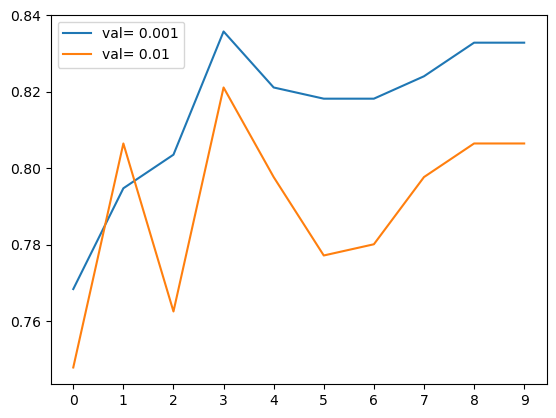

In [36]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train= %s' %lr))
    plt.plot(hist['val_accuracy'], label=('val= %s' %lr))

plt.xticks(np.arange(10))
plt.legend()

In [37]:
learning_rate = 0.001

#### Model checkpointing

In [41]:
model.save_weights('model_v1.h5', save_format='h5')

In [ ]:
checkpointing = keras.callbacks.ModelCheckpoint(
    f"xception_v4_{size:03d}_{drop:.3f}_"+"{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
)

In [44]:
learning_rate = 0.001
model = make_model(learning_rate=learning_rate)

training_history = model.fit(train_ds, 
                             epochs=10, 
                             validation_data=valid_ds,
                             callbacks=[checkpointing])
                            

Epoch 1/10


2024-10-29 18:41:17.167050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.1008 - accuracy: 0.6255

2024-10-29 18:42:05.901678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 55s 559ms/step - loss: 1.1008 - accuracy: 0.6255 - val_loss: 0.7214 - val_accuracy: 0.7478
Epoch 2/10
96/96 [==============================] - 53s 550ms/step - loss: 0.6283 - accuracy: 0.7842 - val_loss: 0.6383 - val_accuracy: 0.7859
Epoch 3/10
96/96 [==============================] - 53s 558ms/step - loss: 0.5113 - accuracy: 0.8269 - val_loss: 0.5882 - val_accuracy: 0.8240
Epoch 4/10
96/96 [==============================] - 50s 520ms/step - loss: 0.4382 - accuracy: 0.8634 - val_loss: 0.5708 - val_accuracy: 0.8299
Epoch 5/10
96/96 [==============================] - 47s 486ms/step - loss: 0.3729 - accuracy: 0.8856 - val_loss: 0.5519 - val_accuracy: 0.8182
Epoch 6/10
96/96 [==============================] - 45s 470ms/step - loss: 0.3301 - accuracy: 0.9029 - val_loss: 0.5521 - val_accuracy: 0.8299
Epoch 7/10
96/96 [==============================] - 47s 486ms/step - loss: 0.2898 - accuracy: 0.9250 - val_loss: 0.5446 - val_accuracy: 0.8270
Epoch 8/10

##### adding more Dense layer

In [45]:
def make_model(learning_rate=0.01, inner_size=100):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3),
    )
    
    base_model.trainable = False
    #########################################
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training =False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(inner_size, activation='relu')(vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    #################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics = ['accuracy'])

    return model

In [62]:
scores = {}
learning_rate
for size in [10, 50, 100,1000]:
    print(size)
    
    model = make_model(learning_rate=learning_rate, inner_size = size)
    training_history = model.fit(train_ds, epochs=10, validation_data=valid_ds, callbacks=[checkpointing])
    scores[size]= training_history.history
    print()
    print()

10
Epoch 1/10


2024-10-30 14:28:18.873087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.4331 - accuracy: 0.5538

2024-10-30 14:29:02.194000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 54s 511ms/step - loss: 1.4331 - accuracy: 0.5538 - val_loss: 1.0641 - val_accuracy: 0.6891
Epoch 2/10
96/96 [==============================] - 48s 496ms/step - loss: 0.8989 - accuracy: 0.7125 - val_loss: 0.8533 - val_accuracy: 0.7478
Epoch 3/10
96/96 [==============================] - 47s 489ms/step - loss: 0.6821 - accuracy: 0.7849 - val_loss: 0.7464 - val_accuracy: 0.7625
Epoch 4/10
96/96 [==============================] - 50s 517ms/step - loss: 0.5778 - accuracy: 0.8100 - val_loss: 0.6680 - val_accuracy: 0.7830
Epoch 5/10
96/96 [==============================] - 47s 491ms/step - loss: 0.4857 - accuracy: 0.8426 - val_loss: 0.6261 - val_accuracy: 0.7713
Epoch 6/10
96/96 [==============================] - 51s 527ms/step - loss: 0.4187 - accuracy: 0.8673 - val_loss: 0.6158 - val_accuracy: 0.8006
Epoch 7/10
96/96 [==============================] - 49s 513ms/step - loss: 0.3730 - accuracy: 0.8814 - val_loss: 0.6077 - val_accuracy: 0.7859
Epoch 8/10

2024-10-30 14:36:26.413833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.0402 - accuracy: 0.6532

2024-10-30 14:37:09.675402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 50s 501ms/step - loss: 1.0402 - accuracy: 0.6532 - val_loss: 0.6889 - val_accuracy: 0.7537
Epoch 2/10
96/96 [==============================] - 48s 499ms/step - loss: 0.5695 - accuracy: 0.7986 - val_loss: 0.6802 - val_accuracy: 0.7771
Epoch 3/10
96/96 [==============================] - 49s 513ms/step - loss: 0.4194 - accuracy: 0.8520 - val_loss: 0.5561 - val_accuracy: 0.8152
Epoch 4/10
96/96 [==============================] - 47s 487ms/step - loss: 0.3152 - accuracy: 0.8980 - val_loss: 0.5485 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 48s 498ms/step - loss: 0.2409 - accuracy: 0.9270 - val_loss: 0.5624 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 47s 488ms/step - loss: 0.1880 - accuracy: 0.9478 - val_loss: 0.5879 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 48s 507ms/step - loss: 0.1393 - accuracy: 0.9674 - val_loss: 0.5616 - val_accuracy: 0.8123
Epoch 8/10

2024-10-30 14:44:28.786691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 0.9519 - accuracy: 0.6806

2024-10-30 14:45:17.453961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 56s 562ms/step - loss: 0.9519 - accuracy: 0.6806 - val_loss: 0.6260 - val_accuracy: 0.7947
Epoch 2/10
96/96 [==============================] - 51s 529ms/step - loss: 0.4849 - accuracy: 0.8276 - val_loss: 0.5698 - val_accuracy: 0.8182
Epoch 3/10
96/96 [==============================] - 52s 542ms/step - loss: 0.3451 - accuracy: 0.8849 - val_loss: 0.5256 - val_accuracy: 0.8299
Epoch 4/10
96/96 [==============================] - 109s 1s/step - loss: 0.2497 - accuracy: 0.9205 - val_loss: 0.6371 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 114s 1s/step - loss: 0.1668 - accuracy: 0.9580 - val_loss: 0.5521 - val_accuracy: 0.8299
Epoch 6/10
96/96 [==============================] - 119s 1s/step - loss: 0.1274 - accuracy: 0.9703 - val_loss: 0.5865 - val_accuracy: 0.8152
Epoch 7/10
96/96 [==============================] - 56s 579ms/step - loss: 0.0862 - accuracy: 0.9850 - val_loss: 0.5765 - val_accuracy: 0.8211
Epoch 8/10
96/96

2024-10-30 14:56:28.909729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 0.9750 - accuracy: 0.6770

2024-10-30 14:57:18.443016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 58s 562ms/step - loss: 0.9750 - accuracy: 0.6770 - val_loss: 0.6374 - val_accuracy: 0.7713
Epoch 2/10
96/96 [==============================] - 52s 546ms/step - loss: 0.4309 - accuracy: 0.8520 - val_loss: 0.5670 - val_accuracy: 0.8240
Epoch 3/10
96/96 [==============================] - 49s 510ms/step - loss: 0.2817 - accuracy: 0.8993 - val_loss: 0.5741 - val_accuracy: 0.8270
Epoch 4/10
96/96 [==============================] - 49s 511ms/step - loss: 0.1555 - accuracy: 0.9521 - val_loss: 0.7048 - val_accuracy: 0.7801
Epoch 5/10
96/96 [==============================] - 49s 510ms/step - loss: 0.0953 - accuracy: 0.9749 - val_loss: 0.6736 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 57s 593ms/step - loss: 0.0466 - accuracy: 0.9925 - val_loss: 0.7277 - val_accuracy: 0.7947
Epoch 7/10
96/96 [==============================] - 50s 516ms/step - loss: 0.0277 - accuracy: 0.9958 - val_loss: 0.6974 - val_accuracy: 0.8240
Epoch 8/10

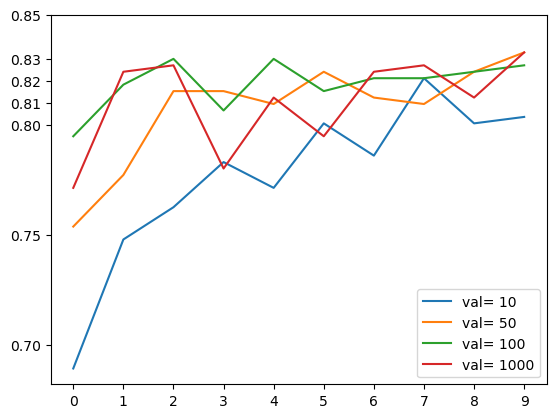

In [65]:
for size, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train= %s' %size))
    plt.plot(hist['val_accuracy'], label=('val= %s' %size))

plt.xticks(np.arange(10))
plt.yticks([.70, 0.75,0.80, 0.81, 0.82, 0.83,0.85])
plt.legend()

### Adding Dropout

In [13]:
checkpointing = keras.callbacks.ModelCheckpoint(
    f"xception_v5_aug_{size:03d}_{drop:.3f}_"+"{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
)

In [10]:
def make_model(learning_rate=0.01, inner_size=50,dropout_rate = 0.2):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3),
    )
    
    base_model.trainable = False
    #########################################
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training =False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(inner_size, activation='relu')(vectors)
    dropout = keras.layers.Dropout(dropout_rate)(inner)
    outputs = keras.layers.Dense(10)(dropout)
    model = keras.Model(inputs, outputs)
    #################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics = ['accuracy'])

    return model

In [26]:
scores = {}
learning_rate=0.001
size = 50
for drop in [0.0,0.1,0.2,0.5,0.7]:
    print(drop)
    
    model = make_model(learning_rate=learning_rate, inner_size = size, dropout_rate=drop)
    training_history = model.fit(train_ds, epochs=30, validation_data=valid_ds, callbacks=[checkpointing])
    scores[drop]= training_history.history
    print()
    print()

0.0
Epoch 1/30


2024-10-30 15:37:45.856991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.0263 - accuracy: 0.6418

2024-10-30 15:38:34.214381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 55s 559ms/step - loss: 1.0263 - accuracy: 0.6418 - val_loss: 0.7103 - val_accuracy: 0.7713
Epoch 2/30
96/96 [==============================] - 52s 539ms/step - loss: 0.5455 - accuracy: 0.8106 - val_loss: 0.5624 - val_accuracy: 0.8035
Epoch 3/30
96/96 [==============================] - 49s 511ms/step - loss: 0.3959 - accuracy: 0.8660 - val_loss: 0.5937 - val_accuracy: 0.7947
Epoch 4/30
96/96 [==============================] - 51s 530ms/step - loss: 0.3111 - accuracy: 0.9045 - val_loss: 0.6075 - val_accuracy: 0.7859
Epoch 5/30
96/96 [==============================] - 50s 516ms/step - loss: 0.2289 - accuracy: 0.9381 - val_loss: 0.5525 - val_accuracy: 0.8211
Epoch 6/30
96/96 [==============================] - 55s 574ms/step - loss: 0.1797 - accuracy: 0.9544 - val_loss: 0.5511 - val_accuracy: 0.8328
Epoch 7/30
96/96 [==============================] - 47s 490ms/step - loss: 0.1427 - accuracy: 0.9651 - val_loss: 0.5866 - val_accuracy: 0.8094
Epoch 8/30

2024-10-30 16:01:36.942443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.1276 - accuracy: 0.6239

2024-10-30 16:02:21.967566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 51s 513ms/step - loss: 1.1276 - accuracy: 0.6239 - val_loss: 0.7399 - val_accuracy: 0.7859
Epoch 2/30
96/96 [==============================] - 45s 468ms/step - loss: 0.6515 - accuracy: 0.7731 - val_loss: 0.6358 - val_accuracy: 0.7859
Epoch 3/30
96/96 [==============================] - 44s 460ms/step - loss: 0.4908 - accuracy: 0.8243 - val_loss: 0.5548 - val_accuracy: 0.8182
Epoch 4/30
96/96 [==============================] - 46s 482ms/step - loss: 0.3857 - accuracy: 0.8690 - val_loss: 0.5335 - val_accuracy: 0.8240
Epoch 5/30
96/96 [==============================] - 44s 463ms/step - loss: 0.3247 - accuracy: 0.8931 - val_loss: 0.5676 - val_accuracy: 0.8035
Epoch 6/30
96/96 [==============================] - 56s 583ms/step - loss: 0.2559 - accuracy: 0.9205 - val_loss: 0.5625 - val_accuracy: 0.8094
Epoch 7/30
96/96 [==============================] - 48s 498ms/step - loss: 0.2077 - accuracy: 0.9377 - val_loss: 0.5731 - val_accuracy: 0.8094
Epoch 8/30

2024-10-30 16:26:23.914833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.1782 - accuracy: 0.6102

2024-10-30 16:27:07.669457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 50s 505ms/step - loss: 1.1782 - accuracy: 0.6102 - val_loss: 0.7411 - val_accuracy: 0.7713
Epoch 2/30
96/96 [==============================] - 48s 500ms/step - loss: 0.7141 - accuracy: 0.7559 - val_loss: 0.5845 - val_accuracy: 0.8387
Epoch 3/30
96/96 [==============================] - 48s 502ms/step - loss: 0.5532 - accuracy: 0.8168 - val_loss: 0.6016 - val_accuracy: 0.7977
Epoch 4/30
96/96 [==============================] - 47s 493ms/step - loss: 0.4607 - accuracy: 0.8449 - val_loss: 0.5561 - val_accuracy: 0.7977
Epoch 5/30
96/96 [==============================] - 46s 476ms/step - loss: 0.3754 - accuracy: 0.8755 - val_loss: 0.5650 - val_accuracy: 0.8094
Epoch 6/30
96/96 [==============================] - 46s 482ms/step - loss: 0.3127 - accuracy: 0.8993 - val_loss: 0.5762 - val_accuracy: 0.8182
Epoch 7/30
96/96 [==============================] - 47s 494ms/step - loss: 0.2740 - accuracy: 0.9175 - val_loss: 0.5543 - val_accuracy: 0.8035
Epoch 8/30

2024-10-30 16:49:58.565624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.4603 - accuracy: 0.5104

2024-10-30 16:50:42.109595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 50s 503ms/step - loss: 1.4603 - accuracy: 0.5104 - val_loss: 0.9143 - val_accuracy: 0.7419
Epoch 2/30
96/96 [==============================] - 45s 474ms/step - loss: 1.0019 - accuracy: 0.6613 - val_loss: 0.7145 - val_accuracy: 0.7889
Epoch 3/30
96/96 [==============================] - 47s 487ms/step - loss: 0.8241 - accuracy: 0.7190 - val_loss: 0.6760 - val_accuracy: 0.7801
Epoch 4/30
96/96 [==============================] - 47s 490ms/step - loss: 0.6955 - accuracy: 0.7591 - val_loss: 0.6247 - val_accuracy: 0.7947
Epoch 5/30
96/96 [==============================] - 49s 510ms/step - loss: 0.6280 - accuracy: 0.7849 - val_loss: 0.5892 - val_accuracy: 0.8006
Epoch 6/30
96/96 [==============================] - 46s 480ms/step - loss: 0.5729 - accuracy: 0.7963 - val_loss: 0.5837 - val_accuracy: 0.8123
Epoch 7/30
96/96 [==============================] - 48s 501ms/step - loss: 0.4990 - accuracy: 0.8250 - val_loss: 0.5651 - val_accuracy: 0.7859
Epoch 8/30

2024-10-30 17:13:27.436764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.7440 - accuracy: 0.3862

2024-10-30 17:14:11.167454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 50s 504ms/step - loss: 1.7440 - accuracy: 0.3862 - val_loss: 1.1861 - val_accuracy: 0.6012
Epoch 2/30
96/96 [==============================] - 48s 506ms/step - loss: 1.3241 - accuracy: 0.5310 - val_loss: 0.9729 - val_accuracy: 0.6862
Epoch 3/30
96/96 [==============================] - 45s 472ms/step - loss: 1.1368 - accuracy: 0.5981 - val_loss: 0.8007 - val_accuracy: 0.7625
Epoch 4/30
96/96 [==============================] - 45s 469ms/step - loss: 1.0135 - accuracy: 0.6470 - val_loss: 0.7334 - val_accuracy: 0.7713
Epoch 5/30
96/96 [==============================] - 47s 485ms/step - loss: 0.9551 - accuracy: 0.6578 - val_loss: 0.7201 - val_accuracy: 0.7771
Epoch 6/30
96/96 [==============================] - 45s 470ms/step - loss: 0.8844 - accuracy: 0.6877 - val_loss: 0.6891 - val_accuracy: 0.7801
Epoch 7/30
96/96 [==============================] - 44s 463ms/step - loss: 0.8337 - accuracy: 0.7060 - val_loss: 0.6529 - val_accuracy: 0.7801
Epoch 8/30

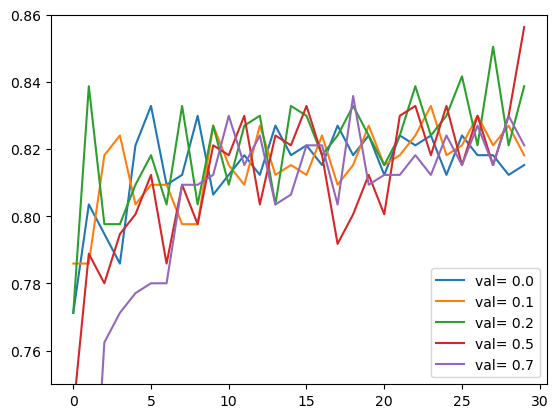

In [28]:
for drop, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val= %s' %drop))
plt.ylim(0.75, 0.86)
plt.legend()

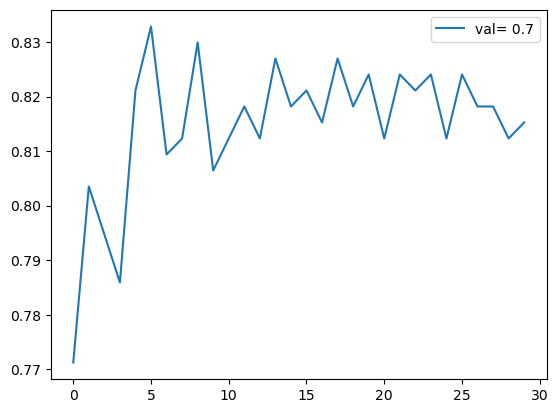

In [44]:
hist =scores[0.0]
plt.plot(hist['val_accuracy'], label=('val= %s' %drop))
#plt.plot(hist['accuracy'], label=('train= %s' %drop))
#plt.ylim(0.7, 1)
plt.legend()

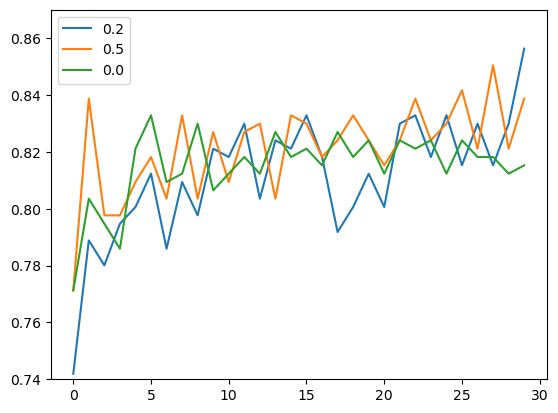

In [49]:
hist =scores[0.5]
plt.plot(hist['val_accuracy'], label=0.2)
#plt.plot(hist['accuracy'], label=('train= %s' %drop))


hist =scores[0.2]
plt.plot(hist['val_accuracy'], label=0.5)

hist =scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

plt.ylim(0.74, 0.87)

plt.legend()

## ADDing Augmentations

In [15]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input, 
    #shear_range= 10.0,
    zoom_range = 0.1,
    vertical_flip = True)

train_ds = train_gen.flow_from_directory('./train', 
                                         target_size=(150,150), 
                                         batch_size=32)

valid_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid_ds = valid_gen.flow_from_directory('./validation', 
                                         target_size=(150,150), 
                                         batch_size=32, 
                                         shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [16]:
learning_rate=0.001
size = 50
drop = 0.2
    
model = make_model(learning_rate=learning_rate, 
                   inner_size = size, 
                   dropout_rate=drop)
training_history = model.fit(train_ds, epochs=20, validation_data=valid_ds, callbacks=[checkpointing])

Epoch 1/20


2024-10-31 18:45:16.288819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.4282 - accuracy: 0.5284

2024-10-31 18:46:04.609495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 55s 554ms/step - loss: 1.4282 - accuracy: 0.5284 - val_loss: 0.8774 - val_accuracy: 0.7390
Epoch 2/20
96/96 [==============================] - 54s 555ms/step - loss: 0.9594 - accuracy: 0.6855 - val_loss: 0.7374 - val_accuracy: 0.7654
Epoch 3/20
96/96 [==============================] - 56s 580ms/step - loss: 0.8269 - accuracy: 0.7210 - val_loss: 0.6849 - val_accuracy: 0.7889
Epoch 4/20
96/96 [==============================] - 57s 594ms/step - loss: 0.7430 - accuracy: 0.7555 - val_loss: 0.6554 - val_accuracy: 0.7859
Epoch 5/20
96/96 [==============================] - 54s 566ms/step - loss: 0.6924 - accuracy: 0.7617 - val_loss: 0.6151 - val_accuracy: 0.7889
Epoch 6/20
96/96 [==============================] - 55s 571ms/step - loss: 0.6312 - accuracy: 0.7790 - val_loss: 0.5998 - val_accuracy: 0.8094
Epoch 7/20
96/96 [==============================] - 103s 1s/step - loss: 0.5955 - accuracy: 0.7999 - val_loss: 0.6161 - val_accuracy: 0.8065
Epoch 8/20
9